In [1]:
# import package
from datetime import date,timedelta
from urllib.request import urlopen
from dateutil import rrule
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import json
import time

%matplotlib inline

In [2]:
# 爬取每月股價的目標網站並包裝成函式
def craw_one_month(stock_number,date):
    url = (
        "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+
        date.strftime('%Y%m%d')+
        "&stockNo="+
        str(stock_number)
    )
    data = json.loads(urlopen(url).read())
    return pd.DataFrame(data['data'],columns=data['fields'])

In [10]:
# 根據使用者輸入的日期，以月為單位，重複呼叫爬取月股價的函式
def craw_stock(stock_number, start_month):
    b_month = date(*[int(x) for x in start_month.split('-')])
    now = datetime.datetime.now().strftime("%Y-%m-%d")         # 取得現在時間
    e_month = date(*[int(x) for x in now.split('-')])
    
    result = pd.DataFrame()
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=b_month, until=e_month):
        result = pd.concat([result,craw_one_month(stock_number,dt)],ignore_index=True)
        time.sleep(2000.0/1000.0);
    
    return result

df = craw_stock(2330,"1994-09-01")
df.set_index("日期", inplace=True)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Text(0,0.5,'stock')

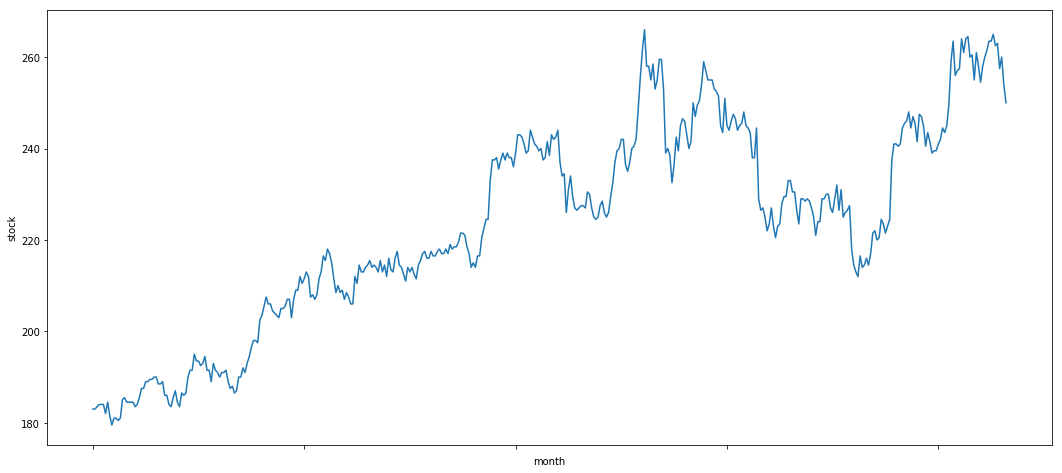

In [11]:
# 將爬取到的歷年股價資訊繪成圖表
df['收盤價']=df['收盤價'].astype(float)
df.loc[:]['收盤價'].plot(figsize=(18, 8))
plt.xlabel('month')
plt.ylabel('stock')

In [12]:
df = df.drop(['成交金額'], axis=1)
df = df.drop(['成交股數'], axis=1)
df.to_csv('tsmc.csv', encoding='utf_8_sig')

KeyError: "labels ['成交金額'] not contained in axis"